In [1]:
!pip install gdown

In [2]:
import gdown
import zipfile
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
from shutil import copy2
from sklearn.model_selection import train_test_split
# from google.colab import files, drive
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
gdown.download(f'https://drive.google.com/uc?id=1ya_MPdn9_igqH4pOqFRmJqMGSPAaWkin', '/content/', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ya_MPdn9_igqH4pOqFRmJqMGSPAaWkin
From (redirected): https://drive.google.com/uc?id=1ya_MPdn9_igqH4pOqFRmJqMGSPAaWkin&confirm=t&uuid=96093cc6-8f91-428d-8abd-b58d6ce6b443
To: /content/Motif_Batik_Dataset.zip
100%|██████████| 331M/331M [00:27<00:00, 11.9MB/s]


'/content/Motif_Batik_Dataset.zip'

In [5]:
# Extract the dataset
zip_ref = zipfile.ZipFile('/content/Motif_Batik_Dataset.zip', 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [8]:
# Define Directories for Dataset
base_dir = '/tmp/dataset/Motif Batik Dataset'

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for train, val, and test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all class names (folder names)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Create class directories in train, val, and test folders
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

In [9]:
# Split data
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    images = [img for img in images if os.path.isfile(os.path.join(cls_dir, img))]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for img in train_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(train_dir, cls))
    for img in val_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(val_dir, cls))
    for img in test_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(test_dir, cls))

In [11]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest'
)

# VALIDATION_DIR = 'data/val'
validation_datagen = ImageDataGenerator(rescale = 1./255)

# TESTING_DIR = 'data/test'
testing_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

testing_generator = testing_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
)

Found 3543 images belonging to 15 classes.
Found 442 images belonging to 15 classes.
Found 449 images belonging to 15 classes.


In [ ]:
# # Menggunakan Transfer Learning
# base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(250,250,3))
# base_model.trainable = False

In [ ]:
# base_model.summary()

In [ ]:
# model = tf.keras.Sequential([
#             # Note the input shape is the desired size of the image 128x128 with 3 bytes color
#             # This is the first convolution
#             base_model,
#             tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Dropout(0.5),

#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(5, activation='softmax')
# ])

# model.summary()

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
111/111 [==============================] - 228s 2s/step - loss: 2.5584 - accuracy: 0.1589 - val_loss: 2.3768 - val_accuracy: 0.2602
Epoch 2/10
111/111 [==============================] - 226s 2s/step - loss: 2.2415 - accuracy: 0.2868 - val_loss: 2.1768 - val_accuracy: 0.3145
Epoch 3/10
111/111 [==============================] - 222s 2s/step - loss: 2.0002 - accuracy: 0.3824 - val_loss: 2.0633 - val_accuracy: 0.3597
Epoch 4/10
111/111 [==============================] - 224s 2s/step - loss: 1.8111 - accuracy: 0.4344 - val_loss: 2.0068 - val_accuracy: 0.3914
Epoch 5/10
111/111 [==============================] - 228s 2s/step - loss: 1.6292 - accuracy: 0.5089 - val_loss: 1.9470 - val_accuracy: 0.4118
Epoch 6/10
111/111 [==============================] - 225s 2s/step - loss: 1.4357 - accuracy: 0.5831 - val_loss: 1.8930 - val_accuracy: 0.4140
Epoch 7/10
111/111 [==============================] - 232s 2s/step - loss: 1.2759 - accuracy: 0.6317 - val_loss: 1.7757 - val_accuracy: 0.4683

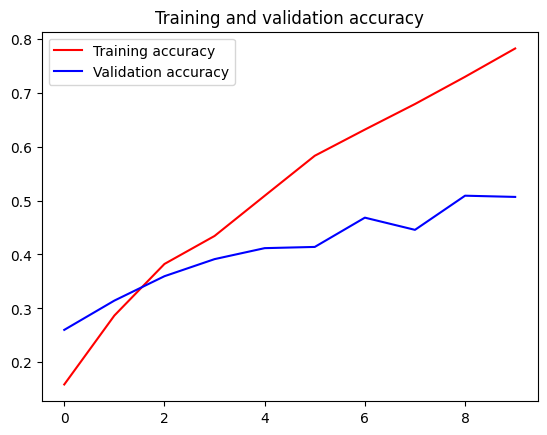

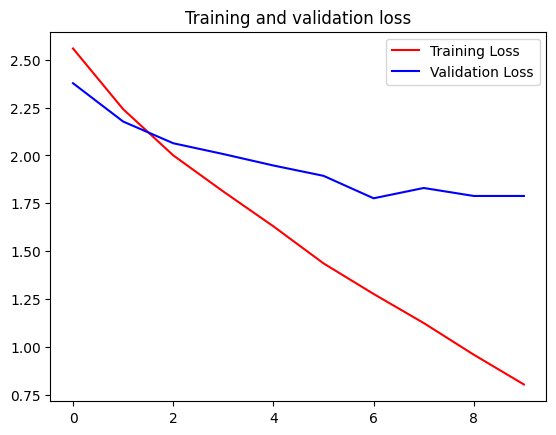

In [15]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Melakukan Prediksi
predictions = model.predict(testing_generator)
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f'Test Accuracy: {test_accuracy}')

15/15 [==============================] - 12s 688ms/step - loss: 1.7019 - accuracy: 0.4944
Test Accuracy: 0.4944320619106293


In [17]:
# Mendapatkan nama kelas dari generator
class_indices = train_generator.class_indices
# Membalikkan dictionary untuk mendapatkan nama kelas dari indeks
labels = {v: k for k, v in class_indices.items()}

# Mengambil label asli dari testing_generator
true_classes = testing_generator.classes
# Mendapatkan nama kelas dari label asli
true_labels = [labels[i] for i in true_classes]

# Mendapatkan nama file dari testing_generator
filenames = testing_generator.filenames

for i, pred in enumerate(predictions):
    # Membulatkan nilai probabilitas menjadi 3 angka di belakang koma
    rounded_classes = np.round(pred, 3)

    # Mendapatkan indeks kelas dengan prediksi tertinggi
    predicted_class_index = np.argmax(pred)
    predicted_class_label = labels[predicted_class_index]

    # Mendapatkan label asli dari indeks
    true_label = true_labels[i]

    print(f"File: {filenames[i]}")
    print(f"True class: {true_label}")
    print(f"Predicted class: {predicted_class_label} (index: {predicted_class_index})")
    print(f"Prediction probabilities: {rounded_classes}")
    print()

File:  Batik-Bali/11_jpg.rf.0d81b7737e7b32426c99bfd710b5063e.jpg
True class:  Batik-Bali
Predicted class:  Batik-Lasem (index: 8)
Prediction probabilities: [0.002 0.098 0.021 0.069 0.006 0.106 0.001 0.013 0.461 0.054 0.138 0.002
 0.001 0.025 0.002]

File:  Batik-Bali/12_jpg.rf.32b107765e0b375295d6e5c076d9326e.jpg
True class:  Batik-Bali
Predicted class:  Batik-Celup (index: 2)
Prediction probabilities: [0.01  0.008 0.277 0.147 0.052 0.044 0.063 0.002 0.003 0.092 0.18  0.028
 0.073 0.005 0.014]

File:  Batik-Bali/13_jpg.rf.92055e228508e3068e406c645f15e408.jpg
True class:  Batik-Bali
Predicted class:  Batik-Bali (index: 0)
Prediction probabilities: [0.524 0.013 0.    0.208 0.039 0.009 0.    0.03  0.016 0.006 0.014 0.013
 0.005 0.072 0.05 ]

File:  Batik-Bali/15_jpg.rf.1f7792ae4f47d33e8be5bc33f973e180.jpg
True class:  Batik-Bali
Predicted class:  Batik-Lasem (index: 8)
Prediction probabilities: [0.153 0.016 0.    0.117 0.006 0.003 0.    0.    0.603 0.001 0.011 0.
 0.    0.075 0.017]

File